In [29]:
'''For preprocessing images'''
import numpy as np
from PIL import Image
import scipy
import matplotlib.pyplot as plt
import csv
import glob

## Commands for the neccessary dependencies below:
- pip install keras
- pip install tensorflow
- pip install --upgrade numpy

In [30]:
'''For CNN'''
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
from matplotlib.pyplot import imshow

## Preprocessing image data:
- I start by standardizing all the images so that they are of the same size 
- Basically I just take the longer size and pad the shorter side to give me a square.
- Then, i resize the image to the size that I desire.

In [31]:
def view_standardized(img):
    # padding
    longer_side = max(img.size)
    horizontal_padding = (longer_side - img.size[0]) / 2
    vertical_padding = (longer_side - img.size[1]) / 2

    img = img.crop(
        (
            -horizontal_padding,
            -vertical_padding,
            img.size[0] + horizontal_padding,
            img.size[1] + vertical_padding
        )
    )
    # resizing to standardized size
    img = img.resize([200,200],Image.ANTIALIAS) 
    plt.imshow(img) # To see the image being standardized.
    return 

## Checking images:
- I displayed the first 3 images.
- From the pictures, we can be assured that they are processed correctly.

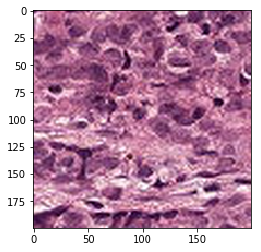

In [32]:
img =Image.open('input/subset_data/train/00bd66215347594c235b77beda5cd30ab75c0f0c.tif')
img = view_standardized(img)

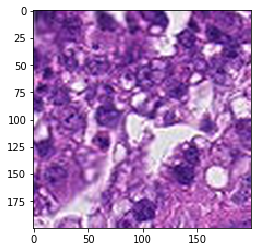

In [33]:
img =Image.open('input/subset_data/train/0a47d53ab3d01e5e49ffa038ff1e272de21fac7b.tif')
img = view_standardized(img)

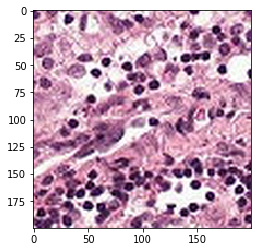

In [34]:
img =Image.open('input/subset_data/train/0b3f6cb0092e8a2e88743cfc37b8602ebf8533a2.tif')
img = view_standardized(img)

## Further preprocessing:
- To use the images as inputs for the neual networks, I need them in matrix form.
- So below, an extra few steps are added to do that.
- For the shape of the matrix, I have selected it to be 200 x 200 x 3.
- Think of it as a square of 200 by 200 pixels.
- Each pixel can take 3 primary colors (red, blue and green).
- This gives us 200 x 200 x 3.
- Note that the dimensionals are just something that I have chosen.
- Dimensionals can be adjusted and played with.

In [35]:
def standardize(img):
    # padding
    longer_side = max(img.size)
    horizontal_padding = (longer_side - img.size[0]) / 2
    vertical_padding = (longer_side - img.size[1]) / 2
    img = img.crop(
        (
            -horizontal_padding,
            -vertical_padding,
            img.size[0] + horizontal_padding,
            img.size[1] + vertical_padding
        )
    )
    # resizing to standardized size
    img = img.resize([200,200],Image.ANTIALIAS) \
    # plt.imshow(img) # To see the image being standardized.
    
    # converting image to numpy array
    img.load()
    img = np.asarray(img, dtype="int32")
    return img

## To double check the dimensions of my image input:

In [36]:
def function():
    for filename in glob.glob('input/subset_data/train/*.tif'):
        img =Image.open(filename)
        img = standardize(img)
        print(img.shape)
        return

In [37]:
function()

(200, 200, 3)


## Loading data:
- Next, we want to load our train and test data using our preprocessing function above.
- The only issue is matching the corresponding output to the image.
- I looped through all rows in csv inputs and match them appropriately.

In [38]:
def get_id_from_filename(filename):
    id = filename.split("\\")[-1]
    id = id.split(".")[0]
    return id

In [39]:
def load_train():
    names = []
    X_train = np.empty((450,200,200,3), dtype="int32")
    Y_train = np.empty(shape=(450,2),dtype="int32")

    i = 0
    for filename in glob.glob('input/subset_data/train/*.tif'):
        names.append(get_id_from_filename(filename))
        img =Image.open(filename)
        img = standardize(img)
        X_train[i-1] = img
        i += 1
        
    with open('input/subset_data/train_labels_full.csv') as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        next(readCSV, None)
        for row in readCSV:
            name = row[0]
            if name in names:
                label = int(row[1])
                if label == 0:
                    Y_train[names.index(name)] = np.array([1,0]) # means 0
                elif label == 1:
                    Y_train[names.index(name)] = np.array([0,1]) # means 1
    return X_train,Y_train

In [40]:
def load_test():
    names = []
    X_test = np.empty((50,200,200,3), dtype="int32")
    Y_test = np.empty(shape=(50,2),dtype="int32")

    i = 0
    for filename in glob.glob('input/subset_data/test_with_outputs/*.tif'):
        names.append(get_id_from_filename(filename))
        img =Image.open(filename)
        img = standardize(img)
        X_test[i-1] = img
        i += 1
        
    with open('input/subset_data/train_labels_full.csv') as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        next(readCSV, None)
        for row in readCSV:
            name = row[0]
            if name in names:
                label = int(row[1])
                if label == 0:
                    Y_test[names.index(name)] = np.array([1,0]) # means 0
                elif label == 1:
                    Y_test[names.index(name)] = np.array([0,1]) # means 1
    return X_test,Y_test

In [41]:
X_train, Y_train = load_train()
X_test, Y_test = load_test()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)
# To check values inside.
# print(X_train)
# print(Y_train)
# print(X_test)
# print(Y_test)

X_train shape:  (450, 200, 200, 3)
Y_train shape:  (450, 2)
X_test shape:  (50, 200, 200, 3)
Y_test shape:  (50, 2)


## CNN model design:
- Before looking at the design, have a read about the basics of CNN [here](https://vinodsblog.com/2018/10/15/everything-you-need-to-know-about-convolutional-neural-networks/) and [here](https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/).
- **Input:** input_shape which is the dimensions of our image.
- **Output:** CNN model
- Summary of model design is dislayed below.

In [42]:
def TrainingModel(input_shape):
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(8, (4, 4), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((8, 8), name='max_pool0')(X)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(16, (2, 2), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool1')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(2, activation='softmax', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='trainingModel')

    return model

In [43]:
trainingModel = TrainingModel((X_train.shape[1],X_train.shape[2],X_train.shape[3]))

In [44]:
trainingModel.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

## If on server:
- Set epochs to 40 and try.
- I am doing a small amount 5 as I am on a CPU.
- I suspect >0.9 accuracy is definitely possible.
- Likewirse, evaluation on test data would also improve.

In [45]:
history = trainingModel.fit(x = X_train, y = Y_train, epochs = 40, batch_size = 32)

Epoch 1/40
450/450 [==============================] - 11s 24ms/step - loss: 224195000.3200 - acc: 0.4889
Epoch 2/40
450/450 [==============================] - 10s 22ms/step - loss: 6596622.7911 - acc: 0.4956
Epoch 3/40
450/450 [==============================] - 10s 22ms/step - loss: -81987678.4356 - acc: 0.4956
Epoch 4/40
450/450 [==============================] - 10s 23ms/step - loss: -119824369.2089 - acc: 0.4956
Epoch 5/40
450/450 [==============================] - 11s 23ms/step - loss: -55310552.7467 - acc: 0.5022
Epoch 6/40
450/450 [==============================] - 10s 22ms/step - loss: -229467981.3689 - acc: 0.4911
Epoch 7/40
450/450 [==============================] - 10s 22ms/step - loss: -231209778.0622 - acc: 0.4933
Epoch 8/40
450/450 [==============================] - 10s 21ms/step - loss: -233103924.3378 - acc: 0.4889
Epoch 9/40
450/450 [==============================] - 11s 25ms/step - loss: -206266692.8356 - acc: 0.5022
Epoch 10/40
450/450 [==============================]

In [46]:
preds = trainingModel.evaluate(x = X_test, y = Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

50/50 [==============================] - 1s 15ms/step

Loss = 232.9612902832031
Test Accuracy = 0.0


# Visualization

In [47]:
import time
import numpy as np
from PIL import Image as pil_image
from keras.preprocessing.image import save_img
from keras import layers
from keras.applications import vgg16
from keras import backend as K

def normalize(x):
    """utility function to normalize a tensor.
    # Arguments
        x: An input tensor.
    # Returns
        The normalized input tensor.
    """
    return x / (K.sqrt(K.mean(K.square(x))) + K.epsilon())


def deprocess_image(x):
    """utility function to convert a float array into a valid uint8 image.
    # Arguments
        x: A numpy-array representing the generated image.
    # Returns
        A processed numpy-array, which could be used in e.g. imshow.
    """
    # normalize tensor: center on 0., ensure std is 0.25
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.25

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x


def process_image(x, former):
    """utility function to convert a valid uint8 image back into a float array.
       Reverses `deprocess_image`.
    # Arguments
        x: A numpy-array, which could be used in e.g. imshow.
        former: The former numpy-array.
                Need to determine the former mean and variance.
    # Returns
        A processed numpy-array representing the generated image.
    """
    if K.image_data_format() == 'channels_first':
        x = x.transpose((2, 0, 1))
    return (x / 255 - 0.5) * 4 * former.std() + former.mean()


def visualize_layer(model,
                    layer_name,
                    step=1.,
                    epochs=15,
                    upscaling_steps=9,
                    upscaling_factor=1.2,
                    output_dim=(412, 412),
                    filter_range=(0, None)):
    """Visualizes the most relevant filters of one conv-layer in a certain model.
    # Arguments
        model: The model containing layer_name.
        layer_name: The name of the layer to be visualized.
                    Has to be a part of model.
        step: step size for gradient ascent.
        epochs: Number of iterations for gradient ascent.
        upscaling_steps: Number of upscaling steps.
                         Starting image is in this case (80, 80).
        upscaling_factor: Factor to which to slowly upgrade
                          the image towards output_dim.
        output_dim: [img_width, img_height] The output image dimensions.
        filter_range: Tupel[lower, upper]
                      Determines the to be computed filter numbers.
                      If the second value is `None`,
                      the last filter will be inferred as the upper boundary.
    """

    def _generate_filter_image(input_img,
                               layer_output,
                               filter_index):
        """Generates image for one particular filter.
        # Arguments
            input_img: The input-image Tensor.
            layer_output: The output-image Tensor.
            filter_index: The to be processed filter number.
                          Assumed to be valid.
        #Returns
            Either None if no image could be generated.
            or a tuple of the image (array) itself and the last loss.
        """
        s_time = time.time()

        # we build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        if K.image_data_format() == 'channels_first':
            loss = K.mean(layer_output[:, filter_index, :, :])
        else:
            loss = K.mean(layer_output[:, :, :, filter_index])

        # we compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, input_img)[0]

        # normalization trick: we normalize the gradient
        grads = normalize(grads)

        # this function returns the loss and grads given the input picture
        iterate = K.function([input_img], [loss, grads])

        # we start from a gray image with some random noise
        intermediate_dim = tuple(
            int(x / (upscaling_factor ** upscaling_steps)) for x in output_dim)
        if K.image_data_format() == 'channels_first':
            input_img_data = np.random.random(
                (1, 3, intermediate_dim[0], intermediate_dim[1]))
        else:
            input_img_data = np.random.random(
                (1, intermediate_dim[0], intermediate_dim[1], 3))
        input_img_data = (input_img_data - 0.5) * 20 + 128

        # Slowly upscaling towards the original size prevents
        # a dominating high-frequency of the to visualized structure
        # as it would occur if we directly compute the 412d-image.
        # Behaves as a better starting point for each following dimension
        # and therefore avoids poor local minima
        for up in reversed(range(upscaling_steps)):
            # we run gradient ascent for e.g. 20 steps
            for _ in range(epochs):
                loss_value, grads_value = iterate([input_img_data])
                input_img_data += grads_value * step

                # some filters get stuck to 0, we can skip them
                if loss_value <= K.epsilon():
                    return None

            # Calulate upscaled dimension
            intermediate_dim = tuple(
                int(x / (upscaling_factor ** up)) for x in output_dim)
            # Upscale
            img = deprocess_image(input_img_data[0])
            img = np.array(pil_image.fromarray(img).resize(intermediate_dim,
                                                           pil_image.BICUBIC))
            input_img_data = [process_image(img, input_img_data[0])]

        # decode the resulting input image
        img = deprocess_image(input_img_data[0])
        e_time = time.time()
        print('Costs of filter {:3}: {:5.0f} ( {:4.2f}s )'.format(filter_index,
                                                                  loss_value,
                                                                  e_time - s_time))
        return img, loss_value

    def _draw_filters(filters, n=None):
        """Draw the best filters in a nxn grid.
        # Arguments
            filters: A List of generated images and their corresponding losses
                     for each processed filter.
            n: dimension of the grid.
               If none, the largest possible square will be used
        """
        if n is None:
            n = int(np.floor(np.sqrt(len(filters))))

        # the filters that have the highest loss are assumed to be better-looking.
        # we will only keep the top n*n filters.
        filters.sort(key=lambda x: x[1], reverse=True)
        filters = filters[:n * n]

        # build a black picture with enough space for
        # e.g. our 8 x 8 filters of size 412 x 412, with a 5px margin in between
        MARGIN = 5
        width = n * output_dim[0] + (n - 1) * MARGIN
        height = n * output_dim[1] + (n - 1) * MARGIN
        stitched_filters = np.zeros((width, height, 3), dtype='uint8')

        # fill the picture with our saved filters
        for i in range(n):
            for j in range(n):
                img, _ = filters[i * n + j]
                width_margin = (output_dim[0] + MARGIN) * i
                height_margin = (output_dim[1] + MARGIN) * j
                stitched_filters[
                    width_margin: width_margin + output_dim[0],
                    height_margin: height_margin + output_dim[1], :] = img

        # save the result to disk
        save_img('vgg_{0:}_{1:}x{1:}.png'.format(layer_name, n), stitched_filters)

    # this is the placeholder for the input images
    assert len(model.inputs) == 1
    input_img = model.inputs[0]

    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])

    output_layer = layer_dict[layer_name]
    assert isinstance(output_layer, layers.Conv2D)

    # Compute to be processed filter range
    filter_lower = filter_range[0]
    filter_upper = (filter_range[1]
                    if filter_range[1] is not None
                    else len(output_layer.get_weights()[1]))
    assert(filter_lower >= 0
           and filter_upper <= len(output_layer.get_weights()[1])
           and filter_upper > filter_lower)
    print('Compute filters {:} to {:}'.format(filter_lower, filter_upper))

    # iterate through each filter and generate its corresponding image
    processed_filters = []
    for f in range(filter_lower, filter_upper):
        img_loss = _generate_filter_image(input_img, output_layer.output, f)

        if img_loss is not None:
            processed_filters.append(img_loss)

    print('{} filter processed.'.format(len(processed_filters)))
    # Finally draw and store the best filters to disk
    _draw_filters(processed_filters)


In [49]:
visualize_layer(trainingModel, "conv0")


Compute filters 0 to 8
Costs of filter   1:    14 ( 2.24s )
Costs of filter   4:     8 ( 2.03s )
Costs of filter   5:    19 ( 2.01s )
Costs of filter   6:    30 ( 2.17s )
Costs of filter   7:    35 ( 2.90s )
5 filter processed.


In [51]:
visualize_layer(trainingModel, "conv1")

Compute filters 0 to 16
Costs of filter   3:     2 ( 3.53s )
Costs of filter   4:     1 ( 3.57s )
Costs of filter   5:     1 ( 3.78s )
Costs of filter   7:     1 ( 3.87s )
Costs of filter   9:     2 ( 3.50s )
Costs of filter  10:     4 ( 3.59s )
Costs of filter  12:     0 ( 3.80s )
Costs of filter  13:     1 ( 3.41s )
Costs of filter  15:     0 ( 3.55s )
9 filter processed.


In [19]:
from math import floor, sqrt, ceil
def display_activation(activations, act_index):
    activation = activations[act_index]
    print(activation.shape)
    num_layers = activation.shape[3]
    
    row_size = floor(sqrt(num_layers))
    col_size = ceil(num_layers/row_size)

    index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*5,col_size*2))
    for row in range(0,row_size):
        for col in range(0,col_size):
            if index >= num_layers:
                break
            ax[row][col].imshow(activation[0, :, :, index], cmap='gray')
            index += 1

In [106]:
from keras.models import Model
layer_outputs = [layer.output for layer in trainingModel.layers[1:]]
activation_model = Model(inputs=trainingModel.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[10].reshape(1, X_train.shape[1], X_train.shape[2], X_train.shape[3]))
layer_outputs
#Layer at index 3,7 are the activation layers


[<tf.Tensor 'zero_padding2d_1/Pad:0' shape=(?, 206, 206, 3) dtype=float32>,
 <tf.Tensor 'conv0/BiasAdd:0' shape=(?, 203, 203, 8) dtype=float32>,
 <tf.Tensor 'bn0/cond/Merge:0' shape=(?, 203, 203, 8) dtype=float32>,
 <tf.Tensor 'activation_1/Relu:0' shape=(?, 203, 203, 8) dtype=float32>,
 <tf.Tensor 'max_pool0/MaxPool:0' shape=(?, 25, 25, 8) dtype=float32>,
 <tf.Tensor 'conv1/BiasAdd:0' shape=(?, 24, 24, 16) dtype=float32>,
 <tf.Tensor 'bn1/cond/Merge:0' shape=(?, 24, 24, 16) dtype=float32>,
 <tf.Tensor 'activation_2/Relu:0' shape=(?, 24, 24, 16) dtype=float32>,
 <tf.Tensor 'max_pool1/MaxPool:0' shape=(?, 6, 6, 16) dtype=float32>,
 <tf.Tensor 'flatten_1/Reshape:0' shape=(?, ?) dtype=float32>,
 <tf.Tensor 'fc/Softmax:0' shape=(?, 2) dtype=float32>]

(1, 203, 203, 8)


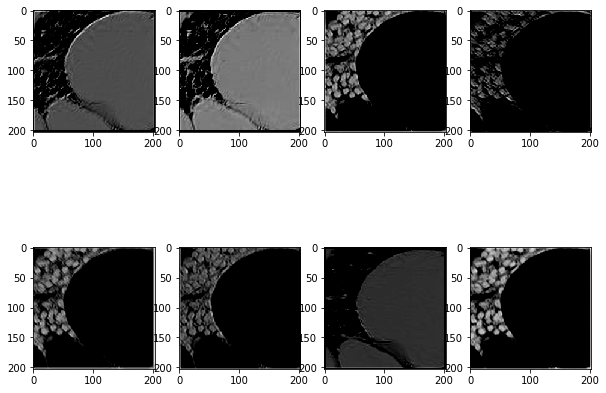

In [107]:
display_activation(activations, 3)

(1, 24, 24, 16)


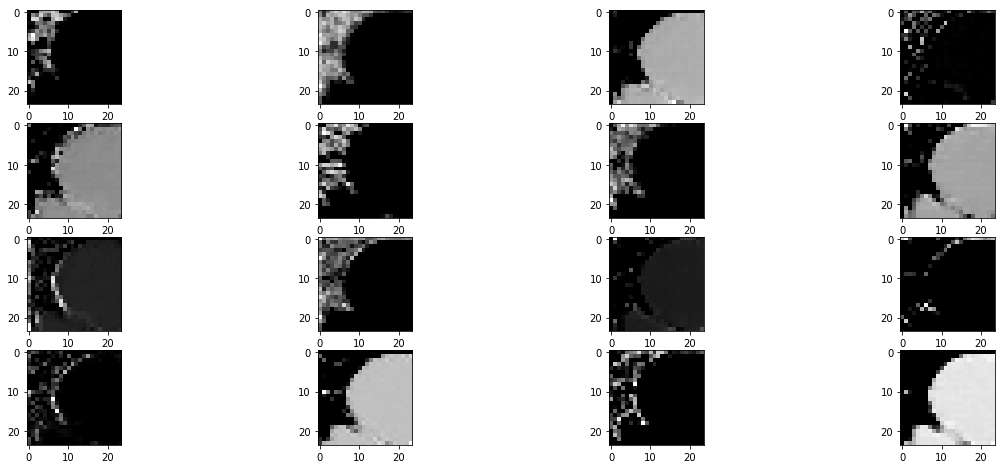

In [108]:
display_activation(activations, 7)

{'loss': [857934.9416666667,
  674506.9425,
  609270.7992361111,
  663160.7739583333,
  556425.2508333334,
  566155.89,
  678238.6427777777,
  824375.2030555556,
  577345.2186111112,
  718429.8161111111],
 'acc': [0.5222222222222223,
  0.56,
  0.5755555555555556,
  0.5622222222222222,
  0.6222222222222222,
  0.6266666666666667,
  0.5688888888888889,
  0.5333333333333333,
  0.5911111111111111,
  0.5533333333333333]}

In [115]:
loss = history.history['loss']
acc = history.history['acc']


In [19]:
# Summary of the CNN model that I used.
trainingModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 206, 206, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 203, 203, 8)       392       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 203, 203, 8)       32        
_________________________________________________________________
activation_1 (Activation)    (None, 203, 203, 8)       0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 25, 25, 8)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 24, 24, 16)        528       
__________

## We now move to attempting transfer learning:
- A simple guide to read [here](https://towardsdatascience.com/keras-transfer-learning-for-beginners-6c9b8b7143e).
- Read the first part before they introduce the code.

## Applying transfer learning (VGG16)
- Using pre-trained weights from VGG model
- freeze all the layers and only train the last 3 layers
- Should give a better accuracy

In [20]:
vgg16_model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False)

In [21]:
# checking the type
type(vgg16_model)

keras.engine.training.Model

In [22]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [23]:
# Create your own input format (here 200x200x3)
X_input = Input(shape=(200,200,3),name = 'image_input')

In [24]:
output_vgg16_conv = vgg16_model(X_input)

In [25]:
# Add the fully-connected layers 
X = Flatten(name='flatten')(output_vgg16_conv)
X = Dense(2048, activation='relu', name='fc1')(X)
X = Dense(2048, activation='relu', name='fc2')(X)
X = Dense(2, activation='softmax', name='predictions')(X)

In [26]:
my_model = Model(inputs=X_input, outputs=X,name='myModel')

In [27]:
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 200, 200, 3)       0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 2048)              37750784  
_________________________________________________________________
fc2 (Dense)                  (None, 2048)              4196352   
_________________________________________________________________
predictions (Dense)          (None, 2)                 4098      
Total params: 56,665,922
Trainable params: 56,665,922
Non-trainable params: 0
________________________________________________________________

In [28]:
my_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

## If on server:
- Set epochs to 5-10 and try.
- I am doing a small amount (1 only...) as I am on a CPU.
- I suspect higher accuracy is definitely possible.

## Another possibility:
- Our actual training data set is much bigger than 450.
- We can unfreeze more layers and train it to attain better results.

In [29]:
my_model.fit(x = X_train, y = Y_train, epochs = 1, batch_size = 32, validation_data=(X_test,Y_test))

Train on 450 samples, validate on 50 samples
Epoch 1/1


KeyboardInterrupt: 

In [ ]:
preds = my_model.evaluate(x = X_test, y = Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

## <span style="color:red">*Note:*</span>
- From this point onwards, it is too computationally intensive and requires a GPU.
- I did not run on my computer but wrote the code for it.
- There might be some minor bugs in the code as I didn't get to run it.

## Applying transfer learning (InceptionV3)
- Using pre-trained weights from VGG model
- freeze all the layers and only train the last 3 layers
- Should give a better accuracy

In [ ]:
inceptionV3_model = keras.applications.inception_v3.InceptionV3(weights='imagenet',include_top=False)

In [ ]:
type(inceptionV3_model)

In [ ]:
inceptionV3_model.summary()

In [ ]:
# Freeze all the other layers, let last few layers to be trainable
for layer in inceptionV3_model.layers[:290]:
    layer.trainable = False

In [ ]:
inceptionV3_model.summary()

In [ ]:
# Create your own input format (here 200x200x3)
X_input = Input(shape=(200,200,3),name = 'image_input')

In [ ]:
output_inceptionV3_conv = inceptionV3_model(X_input)

### Reference:
- https://keras.io/applications/#fine-tune-inceptionv3-on-a-new-set-of-classes
- I just followed whatever they recommended.

In [ ]:
# keras recommended application
X = GlobalAveragePooling2D()(output_inceptionV3_conv)
X = Dense(1024, activation='relu')(X)
X = Dense(4, activation='softmax', name='predictions')(X)

In [ ]:
my_model = Model(inputs=X_input, outputs=X,name='myModel')

In [ ]:
my_model.summary()

In [ ]:
my_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
my_model.fit(x = X_train, y = Y_train, epochs = 3, batch_size = 32, validation_data=(X_test,Y_test))

In [ ]:
preds = my_model.evaluate(x = X_test, y = Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

## Applying transfer learning (ResNet50)
- Using pre-trained weights from VGG model
- freeze all the layers and only train the last 3 layers
- Should give a better accuracy
- Suspected to perform the worst... (might need to confirm)

In [ ]:
# To resolve the issue of BN in keras layers
K.set_learning_phase(1)

In [ ]:
resnet50_model = keras.applications.resnet50.ResNet50(weights='imagenet',include_top=False)

In [ ]:
type(resnet50_model)

In [ ]:
resnet50_model.summary()

In [ ]:
# Freeze all the other layers
for layer in resnet50_model.layers:
    layer.trainable = False

In [ ]:
# Create your own input format (here 200x200x3)
X_input = Input(shape=(200,200,3),name = 'image_input')

In [ ]:
output_resnet50_conv = resnet50_model(X_input)

In [ ]:
X = GlobalAveragePooling2D()(output_resnet50_conv)
# X = Dense(4, activation='softmax', name='predictions')(X)
X = Flatten(name='flatten')(output_resnet50_conv)
X = Dense(2048, activation='relu', name='fc1')(X)
X = Dropout(0.7)(X)
X = Dense(1024, activation='relu', name='fc2')(X)
X = Dropout(0.7)(X)
X = Dense(4, activation='softmax', name='predictions')(X)

In [ ]:
my_model = Model(inputs=X_input, outputs=X,name='myModel')

In [ ]:
my_model.summary()

In [ ]:
my_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
my_model.fit(x = X_train, y = Y_train, epochs = 3, batch_size = 32, validation_data=(X_test,Y_test))

In [ ]:
preds = my_model.evaluate(x = X_test, y = Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

In [ ]:
import sys
print(sys.version)

In [ ]:
ten